# OpenCV by Example

In diesem Notebook werden euch einige Funktionen der Bibliothek OpenCV vorgestellt. OpenCV ist eine populäre Software Biblothek für Computer Vision. Die Funktionalitäten von OpenCV reichen von Bildmanipulation bis hin zur Klassifikation von verschiedenen Bildregionen zu Objekten. OpenCV stellt standardmäßig Interfaces für C++, Python und Java bereit. In diesem Notebook wird Python verwendet.

# Import von OpenCV
Um OpenCV zu verwenden muss die Bibliothek zuerst importiert werden. In Python werden Bibliotheken mit dem **import** Statement implementiert. OpenCV wird in Python als **cv2** Modul in der Regel bezeichnet. Weiterhin benötigen wir noch das Matplotlib um die Bilder im Jupyter Notebook anzuzeigen.

In [31]:
#Magic Function: Dadurch werden die Plots/Bilder im Notebook dargestellt.
%matplotlib inline 

import cv2
import matplotlib.pyplot as plt

## Einlesen von Bilder
Bilder werden mit der Funktion **cv2.imread(pfad)** eingelesen. Dabei können die Bilder in unterschiedlichen Formaten wie jpg oder png und noch viele weiteren vorliegen.

In [32]:
path_to_image = "../resources/home.jpg"
image = cv2.imread(path_to_image)

In [33]:
image.shape

(384, 512, 3)

# Interne Darstellung der Bilder
Bilder werden als Matrix dargestellt. Mit der Methode **image.shape** erhalten wir die Dimensionen des Bilds. Das eingelesene Bild hat die Werte *(384, 512, 3)*. Das bedeutet, dass das Bild eine Höhe von 384, eine Breite von 512 und 3 Kanäle für einen Pixel hat. Die bekannteste Darstellung der 3-Kanäle ist die Rot-Grün-Blau-Darstellung (RGB). Bei OpenCV werden die Bilder standardmäßig als Blau-Grün-Rot-Darstellung (BGR) verarbeitet. 

Format von image.shape: **(Höhe, Breite, Kanäle)**

### Ausgeben der Bilder
Zum Ausgeben der Bilder verwenden wir die Bibliothek Matplotlib, da wir in einem jupyter notebook arbeiten und dadurch nicht die Ausgabefunktion von OpenCV verwenden können. OpenCV verarbeitet die Bilder intern standardmäßig in einem BGR Kanal. Das erste Bild zeigt das Bild im BGR Kanal. Beim zweiten Bild wandeln wir BGR zu RGB mittels der Funktion *cv2.cvtColor(bild, kanal)* um.

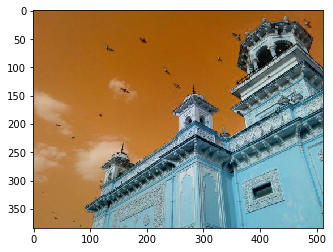

In [34]:
plt.imshow(image)

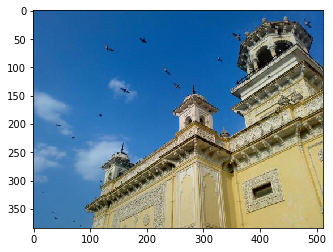

In [55]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## Auswahl der Werte eines Pixels

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# lese Farbwerte an Position y, x
y = 100
x = 50

# erhalten der Werte der Kanäle 
(r, g, b) = rgb_image[y, x]

## Auswählen aller Werte der einzelnen Kanäle
Um die Werte eines einzelnen Kanal auszuwählen, müssen wir zunächst nochmal einen Blick auf die Darstellung der Werte stellen. Dazu orientieren wir uns am **shape** Attribut des Bilds, dass im vorherigen Abschnitt vorgestellt wurde. 

In [61]:
red_channel = rgb_image[:,:, 0]
green_channel = rgb_image[:,:, 1]
blue_channel = rgb_image[:,:, 2]

## Pixel Selection

35 102 170
[255   0   0]


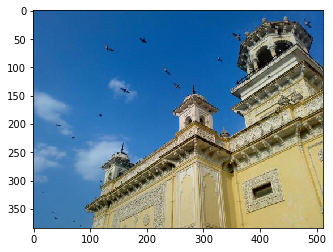

In [36]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# lese Farbwerte an Position y, x
y = 100
x = 50

# erhalten der Werte der Kanäle 
(r, g, b) = rgb_image[y, x]
 
# gib Farbwerte auf Bildschirm aus
print(r,g,b)
 
# setze Farbwerte auf Rot (im RGB-Farbraum)
rgb_image[y, x] = (255, 0, 0)

# ausgeben der Werte des manipulierten Bilds
print(rgb_image[y,x])
plt.imshow(rgb_image)

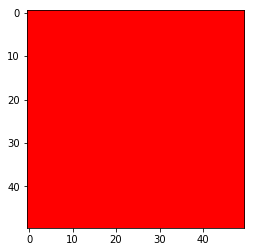

In [37]:
# waehle eine Region of Interest (ROI) an Punkt: (y, x) mit Dimension 50x50 Pixel
region_of_interest = rgb_image[y:y+50, x:x+50]

# setze ROI auf Gruen
region_of_interest[:, :] = (255, 0, 0)
plt.imshow(region_of_interest)

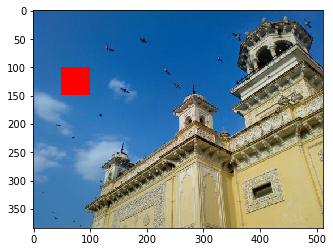

In [38]:
plt.imshow(rgb_image)

## Thresholding

Mit Thresholding können mit Schwellwerten verschiedene Pixelbereiche in einem Bild selektiert werden

In [39]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

selected_pixels = cv2.inRange(rgb_image, (0, 50, 50), (255,150,150))

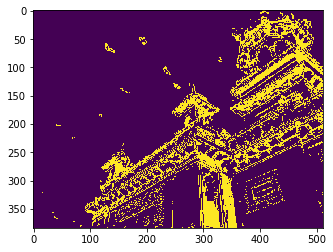

In [40]:
plt.imshow(selected_pixels)

# Objekte zeichnen
Mit OpenCV können standardmäßig geometrische Objekte wie Linien, Rechtecke oder Kreise in ein Bild gezeichnet werden. Bevor diese Funktionen auf das Bild anwenden, kopieren wir davor das RGB Bild mit **copy()**. 

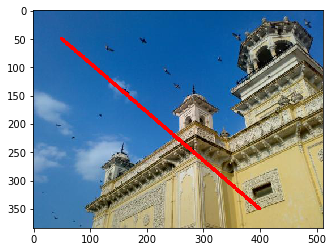

In [41]:
## Lines
# Kopieren des Bilds
line_img = rgb_image.copy()
cv2.line(line_img, (50, 50), (400, 350), (255, 0, 0), thickness=5)
plt.imshow(line_img)

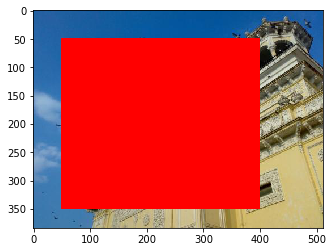

In [42]:
## Rectangle
rect_img = rgb_image.copy()
cv2.rectangle(rect_img, (50, 50), (400, 350), (255, 0, 0), thickness=-1 )
plt.imshow(rect_img)

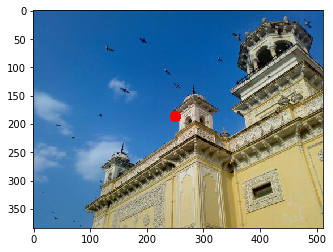

In [63]:
## Circle
circle_img = rgb_image.copy()
height, width = rgb_image.shape[:2] 
cv2.circle(circle_img, (int(width/2)-5, int(height/2)-5), 10, (255, 0, 0), thickness=-1)
plt.imshow(circle_img)

# Haar Cascade Classifier

Haar Cascade Classifier ist eine Methode um Objekterkennung in Bilder vorzunehmen. Dazu werden aus dem Bild Features anhand von Convolutional Kernels entnommen. Ein Kernel ist eine Art Filter die sich über verschiedene Regionen des Bildes schiebt und dabei Werte extrahiert und eine mathematische Operation ausführt. Bei den Haar Cascade Classifer sehen die Kernel wie in diesem [Beispielbild](https://docs.opencv.org/trunk/haar_features.jpg) aus. Dabei werden die Pixel in der weißen und schwarzen Fläche jeweils aufsummiert und anschließend voneinander abgezogen. Diese Werte entsprechen dann den Features.


Dadurch entsteht eine große Anzahl an Features von denen die meisten irrelevant für die Klassifikation sind. Mithilfe von Adaboost werden die wichtigsten Features selektiert. Dazu wird jedes der Features auf die Trainingsbilder angewandt. Anschließend werden die Trainingsbilder klassifiziert. Ein Beispiel für eine Klassifikation ist die Gesichtserkennung, bei der ein Klassifizier bestimmt, ob auf dem Bild ein Gesicht zu sehen ist oder nicht (0/1). Da dabei viele Missklassifikationen entstehen werden nur die Features ausgewählt, die die geringste Fehlerrate bei der Klassifikation haben. 

Der finale Klassifizierer besteht dann aus den besimmten Features. Für die Klassifikation bewegt sich ein Sliding Window durch das Bild. Das Sliding Window repräsentiert einen kleien Teilbereich des Bilds und extrahiert die Bilder. Am besten versteht man das Konzept, wenn man sich diese [Beispiel](https://www.pyimagesearch.com/wp-content/uploads/2015/03/sliding-window-animated-sot.gif) anschaut. Da hier pro Region alle Features extrahiert werden, ist der Algorithmus aus Sicht der Performance kritisch. Um das Verfahren zu beschleunigen durchläuft eine Region mehrere Stages. In einer Stage wird eine Teil der Features extrahiert und klassifiziert. Wenn bei der Klassifizierung "etwas gefunden" wurde, wird die nächste Stage auf die Region angewandt, andernfalls abgebrochen. Aus diesem Grund heißt diese Konzept **Cascade of Classifiers**.


Standardmäßig enthält OpenCV vortrainierte Model die im Installationsverzeichnis von OpenCV im Pfad *data/haarcascades/haarcascade_frontalface_default.xml* abgespeichert sind.

### Face Cascade

In [64]:
face_cascade = cv2.CascadeClassifier('/Users/naxty/Tools/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

In [65]:
image = cv2.imread("../resources/img_649.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Das Bild wird zur Graustufendarstellung umgewandelt.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

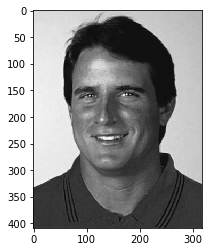

In [66]:
plt.imshow(gray, cmap='gray')

In [67]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

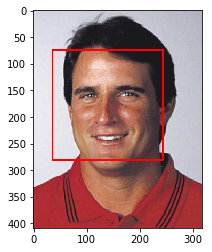

In [68]:
plt.imshow(image)

### Eye Cascade

In [71]:
eye_cascade = cv2.CascadeClassifier('/Users/naxty/Tools/opencv/data/haarcascades/haarcascade_eye.xml')

In [72]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

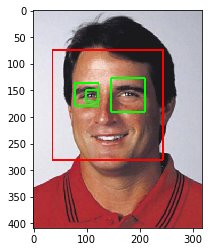

In [73]:
plt.imshow(image)

Problem: Wir haben hier ein Auge mehrfach erkannt. In der Computer Vision gibt es dafür Algorithmen um solche Sachen zu präventieren bzw. algorithmisch zu verhindern. 

# Pedestrian tracker

In [40]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [55]:
image = cv2.imread("resources/FudanPed00010.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

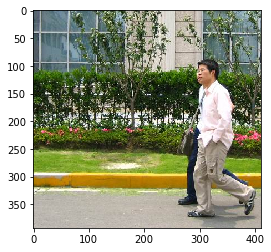

In [56]:
plt.imshow(image)

In [57]:
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
    padding=(8, 8), scale=1.5)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 

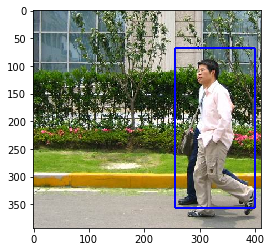

In [58]:
plt.imshow(image)